# ACS3930 Assignment 1

Based on the given classes and functions, finish the three questions marked in red. Leave comments to explain your code. I will grade your assignment based on the completeness of your code and the clarity of the comments. 

Have fun with your Assignment 1!

Your name:Loveleen Kaur



In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import heapq
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations
import copy

# Problem class

In [143]:
class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)
    

class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost
    
    
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.
    
    
def expand(problem, node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in problem.actions(s):
        s1 = problem.result(s, action)
        cost = node.path_cost + problem.action_cost(s, action, s1)
        yield Node(s1, node, action, cost)
        

def path_actions(node):
    "The sequence of actions to get to this node."
    if node.parent is None:
        return []  
    return path_actions(node.parent) + [node.action]


def path_states(node):
    "The sequence of states to get to this node."
    if node in (cutoff, failure, None): 
        return []
    return path_states(node.parent) + [node.state]

class CountCalls:
    """Delegate all attribute gets to the object, and count them in ._counts"""
    def __init__(self, obj):
        self._object = obj
        self._counts = Counter()
        
    def __getattr__(self, attr):
        "Delegate to the original object, after incrementing a counter."
        self._counts[attr] += 1
        return getattr(self._object, attr)

# Queues

First-in-first-out and Last-in-first-out queues, and a `PriorityQueue`, which allows you to keep a collection of items, and continually remove from it the item with minimum `f(item)` score.

In [144]:
FIFOQueue = deque

LIFOQueue = list

class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x): 
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)
            
    def empty(self):
        """Return True if the priority queue is empty, False otherwise."""
        return len(self.items) == 0
         
    def add(self, item):
        """Add item to the queuez."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]
    
    def top(self): return self.items[0][1]

    def __len__(self): return len(self.items)

## <font color='red'>Q1: What are below search algorithms? name them.</font>


In [145]:
# what is below search algorithm? put your answer here: 
#best-first search algorithm
def search_1(problem, f):
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure


In [146]:
# what is below search algorithm? put your answer here: 
#Best-First Search with Depth-Limited Cycle Checking
def search_2(problem, f):
    frontier = PriorityQueue([Node(problem.initial)], key=f)
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            if not is_cycle(child):
                frontier.add(child)
    return failure

def is_cycle(node, k=30):
    def find_cycle(ancestor, k):
        return (ancestor is not None and k > 0 and
                (ancestor.state == node.state or find_cycle(ancestor.parent, k - 1)))
    return find_cycle(node.parent, k)


In [147]:
def g(n): return n.path_cost

# what is below search algorithm? put your answer here:
#Uniform-Cost Search
def search_3(problem):
    return search_1(problem, f=g)


In [148]:
# what is below search algorithm? put your answer here: 
#Breadth-First Search 
def search_4(problem):
    return search_1(problem, f=len)


In [149]:
# what is below search algorithm? put your answer here: 
#Depth-First Search 
def search_5(problem):
    return search_1(problem, f=lambda n: -len(n))

In [150]:
# what is below search algorithm? put your answer here: 
#Breadth-First Search 
def search_6(problem):
    node = Node(problem.initial)
    if problem.is_goal(problem.initial):
        return node
    frontier = FIFOQueue([node])
    reached = {problem.initial}
    while frontier:
        node = frontier.pop()
        for child in expand(problem, node):
            s = child.state
            if problem.is_goal(s):
                return child
            if s not in reached:
                reached.add(s)
                frontier.appendleft(child)
    return failure

In [151]:
# what is below search algorithm? put your answer here: 
#Depth-Limited Search
def search_7(problem, limit=10):
    frontier = LIFOQueue([Node(problem.initial)])
    result = failure
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        elif len(node) >= limit:
            result = cutoff
        elif not is_cycle(node):
            for child in expand(problem, node):
                frontier.append(child)
    return result

In [152]:
# what is below search algorithm? put your answer here: 
#Iterative Deepening Search
def search_8(problem):
    for limit in range(1, sys.maxsize):
        result = search_7(problem, limit)
        if result != cutoff:
            return result

## <font color='red'>Q2: Define a subclass called "MazeProblem" from the Problem class we defined at the begining.</font>

### Objective: 
To apply your knowledge of search problems in artificial intelligence, implement a MazeProblem class in Python. This class should extend a given abstract class Problem and apply to a simple 2D maze.

### Background: 
In search problems, the objective is to find a path from an initial state to a goal state within a given environment. In this assignment, your environment is a 2D maze represented by a grid of cells. Each cell can either be open (0) or blocked (1). Your task is to navigate from a given starting point to a target location in the maze.

### Task:

#### Class Implementation:

Define a class `MazeProblem` that inherits from the abstract class Problem.
The constructor `__init__` should take three parameters: `initial`, `goal`, and `maze`. Here, initial is a tuple representing the starting coordinates (x, y) in the maze, goal is a tuple representing the target coordinates, and maze is a list of lists representing the 2D maze grid.

Implement the method actions that returns a list of possible actions from the current state. Actions can be "Up", "Down", "Left", or "Right", and you cannot move into blocked cells or outside the maze.

Implement the method result that returns the resulting state from taking an action at the current state.

#### Maze Creation:

Create a simple 5x5 maze as a list of lists, where 0 represents an open path, and 1 represents a blocked path.
Define a starting point and a goal within the maze.

#### Testing:

Create an instance of MazeProblem with the maze, the starting point, and the goal. Using the `search_3`,`search_4`,..., `search_8` search algorithms defined above to solve the problem. Return the solutions using the given`path_states()` function. 

Design an experiemnt to compare their runing time. You may find python `%timeit` function useful.


In [153]:
import time
class MazeProblem(Problem):
    
    def __init__(self, initial, goal, maze):
        """Define a Maze problem. Maze is a grid of 1s and 0s, where 1s are blocked."""
        super().__init__(initial, goal)
        self.maze = maze

    def actions(self, state):
        """Return actions available from the current state."""
        actions = []
        x, y = state
        if y > 0 and self.maze[x][y-1] == 0: actions.append("Up")
        if y < len(self.maze[0]) - 1 and self.maze[x][y+1] == 0: actions.append("Down")
        if x > 0 and self.maze[x-1][y] == 0: actions.append("Left")
        if x < len(self.maze) - 1 and self.maze[x+1][y] == 0: actions.append("Right")
        return actions

    def result(self, state, action):
        """Return the resulting state from taking an action at the current state."""
        x, y = state
        if action == "Up": return (x, y-1)
        if action == "Down": return (x, y+1)
        if action == "Left": return (x-1, y)
        if action == "Right": return (x+1, y)

In [154]:
# Define a simple maze as a list of lists where 0 is open and 1 is a wall
maze = [[0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0]]

# Create a MazeProblem instance
initial_state = (0, 0)  # Start at the top-left corner
goal_state = (4, 4)     # Goal is the bottom-right corner
maze_instance = MazeProblem(initial_state, goal_state, maze)


Uniform Cost Search: Solution found in 0.000138 seconds.
Uniform Cost Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Breadth-First Search: Solution found in 0.000098 seconds.
Breadth-First Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Depth-First Search: Solution found in 0.000089 seconds.
Depth-First Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
BFS (FIFOQueue): Solution found in 0.000066 seconds.
BFS (FIFOQueue): Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Depth-Limited Search: Solution found in 0.000079 seconds.
Depth-Limited Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Iterative Deepening Search: Solution found in 0.000598 seconds.
Iterative Deepening Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


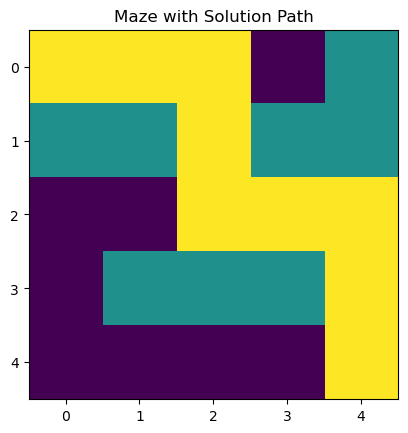

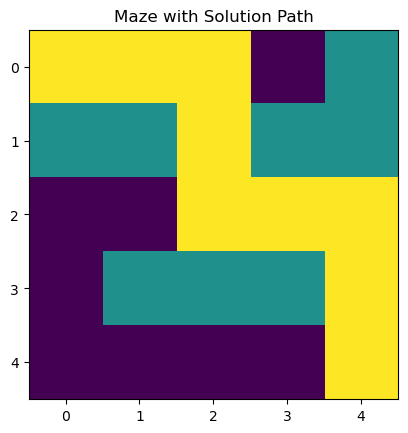

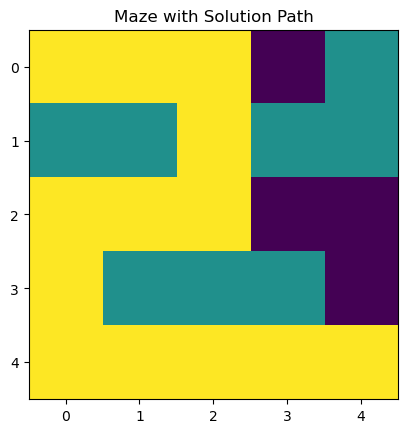

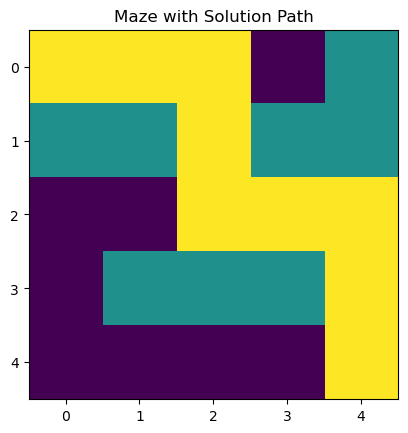

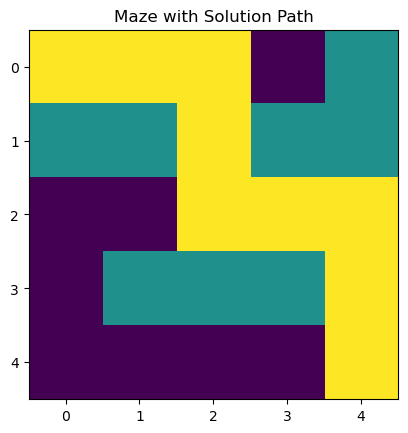

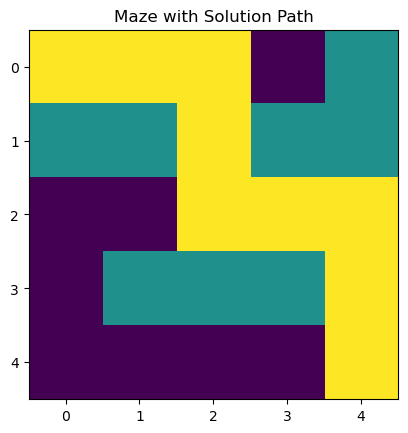

In [155]:
# using the search_3,search_4,..., search_8 algorithms to solve the problem

#put your code here
#Search algorithms to test
search_algorithms = [search_3, search_4, search_5, search_6, search_7, search_8]
search_names = ["Uniform Cost Search", "Breadth-First Search", "Depth-First Search", "BFS (FIFOQueue)", "Depth-Limited Search", "Iterative Deepening Search"]


# Running and timing the search algorithms

results = {}#empty dictionary to store the outcomes

#iterating through the search algorithms

for i, search_func in enumerate(search_algorithms):
    start_time = time.time()#Recording start time
    
    if search_func == search_7:  # defining a limit for DLS cuz it needs a limit
        solution_node = search_func(maze_instance, limit=15) #setting the limit to 15
    else:
        solution_node = search_func(maze_instance)#other algorithms
        
    end_time = time.time()#recording the end time
    
    
    if solution_node:#check if solution was found
        solution_path = path_states(solution_node)#extracting the path
        
        #storing the path and the time taken by the algorithm
        results[search_names[i]] = {"path": solution_path, "time": end_time - start_time}
        
        #printing the results
        print("{}: Solution found in {:.6f} seconds.".format(search_names[i], end_time - start_time))
        print("{}: Path: {}".format(search_names[i], solution_path))
        
    #If no solution found or there is a cutoff reached for Depth-Limited Search    
    else:
        #we can store None as the path and print time
        results[search_names[i]] = {"path": None, "time": end_time - start_time}
        print("{}: No solution found or cutoff in {:.6f} seconds.".format(search_names[i], end_time - start_time))

# I have also included code to visualize the path
import numpy as np

maze_np = np.array(maze) # Converting to numpy for easier manipulation

def visualize_path(maze, path):
    maze_viz = np.copy(maze) # Creating a copy to avoid modifying the original maze
    if path:
        for x, y in path:
            maze_viz[x, y] = 2  # Marking the path with a different value 
    plt.imshow(maze_viz, cmap='viridis')
    plt.title("Maze with Solution Path")
    plt.show()

# Visualizing the path for our algorithms 
visualize_path(maze, results["Breadth-First Search"]["path"])
visualize_path(maze, results["Uniform Cost Search"]["path"])
visualize_path(maze, results["Depth-First Search"]["path"])
visualize_path(maze, results["BFS (FIFOQueue)"]["path"])
visualize_path(maze, results["Depth-Limited Search"]["path"])
visualize_path(maze, results["Iterative Deepening Search"]["path"])

#Timing using %timeit (in ipython or jupyter notebook)
#Example:
#%timeit search_4(maze_instance)

# example solution returned by path_states(): 
# search_1 solution: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
# search_2 solution: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
# ...
# search_8 solution: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


## <font color='red'>Q3: Bidirectional search.</font>

Given below functions about bidirectional search, define the heuristic functions (using manhattan distance) for forward and backward search in MazeProblem.

Using the `bidirectional_uniform_cost_search` and `bidirectional_astar_search algorithms` to solve the problem. Return the solutions using the given `path_states()` function.

Design an experiemnt to compare the runing time of `search_3`, `search_4`,...,`search_8`, `bidirectional_uniform_cost_search`, and `bidirectional_astar_search algorithms`. You may find python `%timeit` function useful.


In [156]:
def bidirectional_best_first_search(problem_f, f_f, problem_b, f_b, terminated):
    node_f = Node(problem_f.initial)
    node_b = Node(problem_f.goal)
    frontier_f, reached_f = PriorityQueue([node_f], key=f_f), {node_f.state: node_f}
    frontier_b, reached_b = PriorityQueue([node_b], key=f_b), {node_b.state: node_b}
    solution = failure
    while frontier_f and frontier_b and not terminated(solution, frontier_f, frontier_b):
        def S1(node, f):
            return str(int(f(node))) + ' ' + str(path_states(node))
        #print('Bi:', S1(frontier_f.top(), f_f), S1(frontier_b.top(), f_b))
        if f_f(frontier_f.top()) < f_b(frontier_b.top()):
            solution = proceed('f', problem_f, frontier_f, reached_f, reached_b, solution)
        else:
            solution = proceed('b', problem_b, frontier_b, reached_b, reached_f, solution)
    return solution

def proceed(direction, problem, frontier, reached, reached2, solution):
    node = frontier.pop()
    for child in expand(problem, node):
        s = child.state
        #print('proceed', direction, S(child))
        if s not in reached or child.path_cost < reached[s].path_cost:
            frontier.add(child)
            reached[s] = child
            if s in reached2: # Frontiers collide; solution found
                solution2 = (join_nodes(child, reached2[s]) if direction == 'f' else
                             join_nodes(reached2[s], child))
                #print('solution', path_states(solution2), solution2.path_cost, 
                # path_states(child), path_states(reached2[s]))
                if solution2.path_cost < solution.path_cost:
                    solution = solution2
    return solution

def join_nodes(nf, nb):
    """Join the reverse of the backward node nb to the forward node nf."""
    #print('join', S(nf), S(nb))
    join = nf
    while nb.parent is not None:
        cost = join.path_cost + nb.path_cost - nb.parent.path_cost
        join = Node(nb.parent.state, join, nb.action, cost)
        nb = nb.parent
        #print('  now join', S(join), 'with nb', S(nb), 'parent', S(nb.parent))
    return join

# Termination condition for bidirectional search
def terminated(solution, frontier_f, frontier_b):
    if frontier_f.empty() or frontier_b.empty():
        return True
    n_f, n_b = frontier_f.top(), frontier_b.top()
    return (n_f.path_cost + n_b.path_cost) >= solution.path_cost if solution else False


In [157]:
def inverse_problem(problem):
    if isinstance(problem, CountCalls):
        return CountCalls(inverse_problem(problem._object))
    else:
        inv = copy.copy(problem)
        inv.initial, inv.goal = inv.goal, inv.initial
        return inv
    
def bidirectional_uniform_cost_search(problem_f):
    def terminated(solution, frontier_f, frontier_b):
        n_f, n_b = frontier_f.top(), frontier_b.top()
        return g(n_f) + g(n_b) > g(solution)
    return bidirectional_best_first_search(problem_f, g, inverse_problem(problem_f), g, terminated)

def bidirectional_astar_search(problem_f):
    def terminated(solution, frontier_f, frontier_b):
        nf, nb = frontier_f.top(), frontier_b.top()
        return g(nf) + g(nb) > g(solution)
    problem_b = inverse_problem(problem_f)
    return bidirectional_best_first_search(problem_f, lambda n: g(n) + problem_f.h(n),
                                           problem_b, lambda n: g(n) + problem_b.h(n), 
                                           terminated)
   

In [158]:
# define the heuristic functions (using manhattan distance) for forward and backward search in MazeProblem

def manhattan_distance(state, goal):
    #put your code here
    x1, y1 = state
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)
    
def f_f(node):
    #put your code here
    
    return node.path_cost + manhattan_distance(node.state, maze_instance.goal)

def f_b(node):
    #put your code here
    
    return node.path_cost + manhattan_distance(node.state, maze_instance.initial)

    

In [159]:
# `bidirectional_uniform_cost_search` and `bidirectional_astar_search algorithms`

#put your code here

search_algorithms = [bidirectional_uniform_cost_search, bidirectional_astar_search]
search_names = ["Bidirectional Uniform Cost Search", "Bidirectional A* Search"]

# Dictionary to store the results (only paths)
results = {}

# Running the search algorithms
for i, search_func in enumerate(search_algorithms):
    solution_node = search_func(maze_instance)  # No limit needed

    if solution_node and solution_node != failure and solution_node != cutoff:  # Checking for valid solution
        
        solution_path = path_states(solution_node)
        results[search_names[i]] = {"path": solution_path}  # only storing the path
        print("{}: Path: {}".format(search_names[i], solution_path))
        
    else:
        results[search_names[i]] = {"path": None}  # Storing None if no solution

        


# example solution returned by path_states(): 
# bidirectional_astar_search solution: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
# bidirectional_uniform_cost_search solution: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]




Bidirectional Uniform Cost Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Bidirectional A* Search: Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


In [160]:
# Design an experiemnt to compare the runing time of search_3, search_4,...,search_8, 
# bidirectional_uniform_cost_search, and bidirectional_astar_search algorithms. 
# You may find python `timeit` function useful.

#put your code here
import timeit
# List of search algorithms to test
search_algorithms = [search_3, search_4, search_5, search_6, search_7, search_8,
                     bidirectional_uniform_cost_search, bidirectional_astar_search]
search_names = ["Uniform Cost Search", "Breadth-First Search", "Depth-First Search", "BFS (FIFOQueue)", 
                "Depth-Limited Search", "Iterative Deepening Search",
                "Bidirectional Uniform Cost Search", "Bidirectional A* Search"]

# Dictionary to store the timing results
timing_results = {}

# Number of times to run each algorithm for timing
number_of_runs = 10  # Arbitrarily choosing 10

for i, search_func in enumerate(search_algorithms):
    if search_func == search_7:#setting the limit for depth-limited search again
        #this time, we are using the timeit function.
        time = timeit.timeit(lambda: search_func(maze_instance, limit=15), number=number_of_runs)
    else:
        #others don't need a limit
        time = timeit.timeit(lambda: search_func(maze_instance), number=number_of_runs)

    #storing the avg time in the timing_results dictionary    
    timing_results[search_names[i]] = time / number_of_runs  # Average time over runs
    #printing the results
    print("{}: Average time over {} runs: {:.6f} seconds".format(search_names[i], number_of_runs, timing_results[search_names[i]]))


Uniform Cost Search: Average time over 10 runs: 0.000069 seconds
Breadth-First Search: Average time over 10 runs: 0.000078 seconds
Depth-First Search: Average time over 10 runs: 0.000083 seconds
BFS (FIFOQueue): Average time over 10 runs: 0.000059 seconds
Depth-Limited Search: Average time over 10 runs: 0.000072 seconds
Iterative Deepening Search: Average time over 10 runs: 0.000454 seconds
Bidirectional Uniform Cost Search: Average time over 10 runs: 0.000135 seconds
Bidirectional A* Search: Average time over 10 runs: 0.000173 seconds
